In [131]:
from datetime import datetime

import numpy as np
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from astropy.io import fits
from astropy.time import Time

import astropy.visualization as viz

from regions.core import PixCoord
from regions.shapes.circle import CirclePixelRegion

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
hdul = fits.open("../data/2022_10_27__19_29_35.fits")
red = hdul[0].data[0, :, :]
green = hdul[0].data[1, :, :]
blue = hdul[0].data[2, :, :]

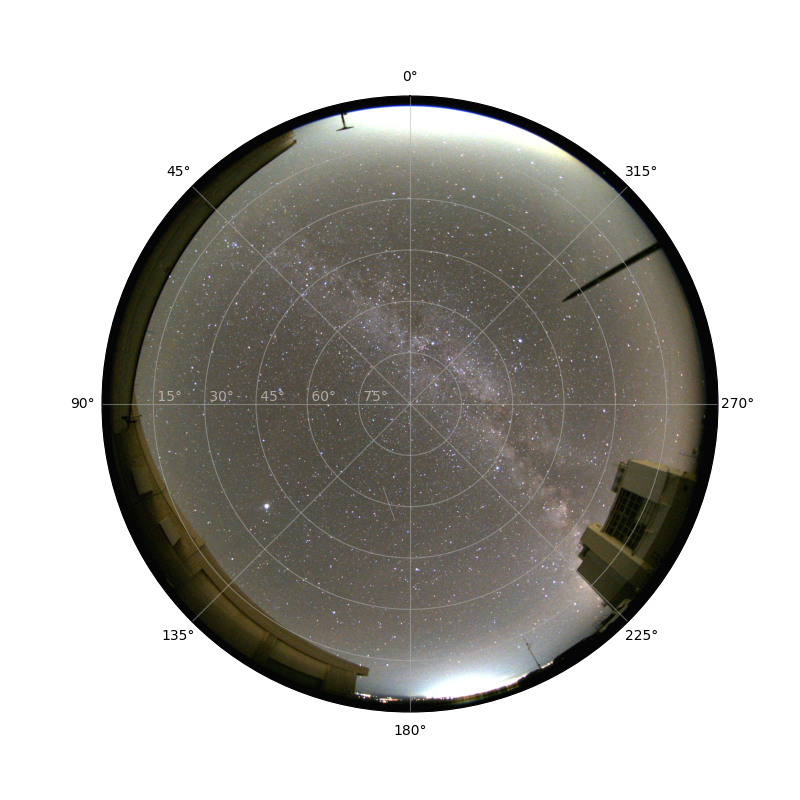

In [159]:
a = np.transpose(hdul[0].data, axes=(1, 2, 0)) - 2000

fig, ax = plt.subplots(figsize=(8, 8)) #, subplot_kw=dict(projection='polar'))
circle = Circle((700, 700), 700, facecolor='none', edgecolor=(0, 0, 0), linewidth=1, alpha=0.5)
ax.add_patch(circle)
ax.axis("off")

a = a * 1.0
a[a <= 0] = 0
a[:, :, 1] *= 0.7
a[:, :, 2] *= 1.7
b = a[5:-5, 300:1701, :]
c = np.fliplr(rotate(b, -65, reshape=False))
stretch = viz.PowerStretch(0.75) + viz.ZScaleInterval(contrast=0.35)
c = stretch(c)
im_plot = plt.imshow(c)
im_plot.set_clip_path(circle)

pax = fig.add_subplot(111, polar=True, label='polar')
pax.set_facecolor("None")
pax.set_theta_zero_location("N")
yticks = np.array([15, 30, 45, 60, 75]) / 90.0
ylabels = [" 75°", " 60°", " 45°", " 30°", " 15°"]
pax.set_yticks(yticks, labels=ylabels, color="white", alpha=0.5)
pax.set_rlabel_position(90)
pax.tick_params(grid_alpha=0.5)

plt.show()
plt.imsave("allsky.png", c)

In [66]:
# the PRISM format wants to use this for time for the first line of a file containing telescope's pointing position
Time.now().jd - 2415020

44867.63031683257

image parameters for new alcor camera: x cen = 1003, y cen = 709, R = 675; north position 267 with east-west mirrored. camera basically cocked 3 deg too far west.

In [94]:
plt.close('all')

In [125]:
c.shape

(1401, 1401, 3)

In [121]:
hdul_d = fits.open("../data/2022_11_04__13_56_03.fits.bz2")
hdul_d[0].data.shape

(3, 1411, 2072)

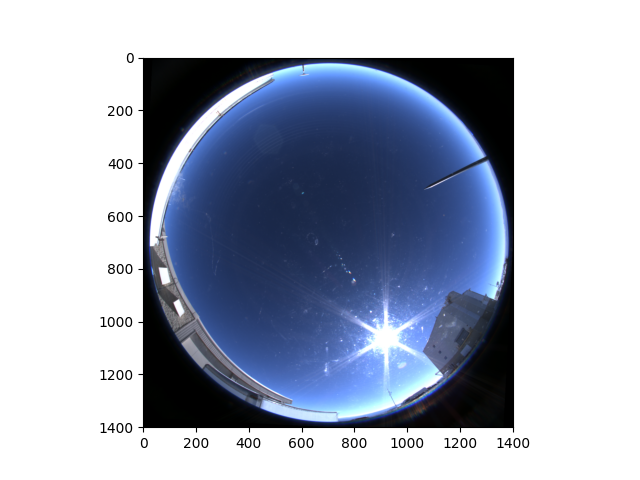

In [124]:
day = np.transpose(hdul_d[0].data, axes=(1, 2, 0)) - 2000
day[day < 0] = 0
day = day * 1.0
day[:, :, 1] *= 0.7
day[:, :, 2] *= 1.7
day = day[5:-5, 300:1701, :]
day = np.flipud(rotate(day, 3, reshape=False))
stretch = viz.PowerStretch(0.75) + viz.ZScaleInterval(contrast=0.35)
day = stretch(day)
plt.imshow(day)
plt.show()

In [117]:
len(hdul_d)

1

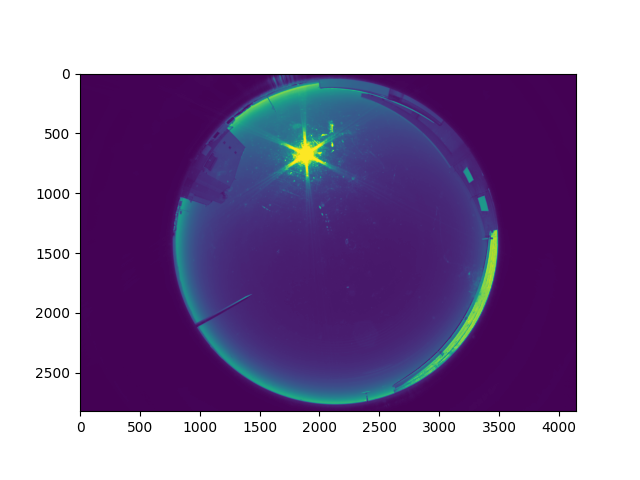

In [119]:
plt.imshow(hdul_d[0].data)
plt.show()

In [162]:
from skycam_utils.alcor import fits_to_png

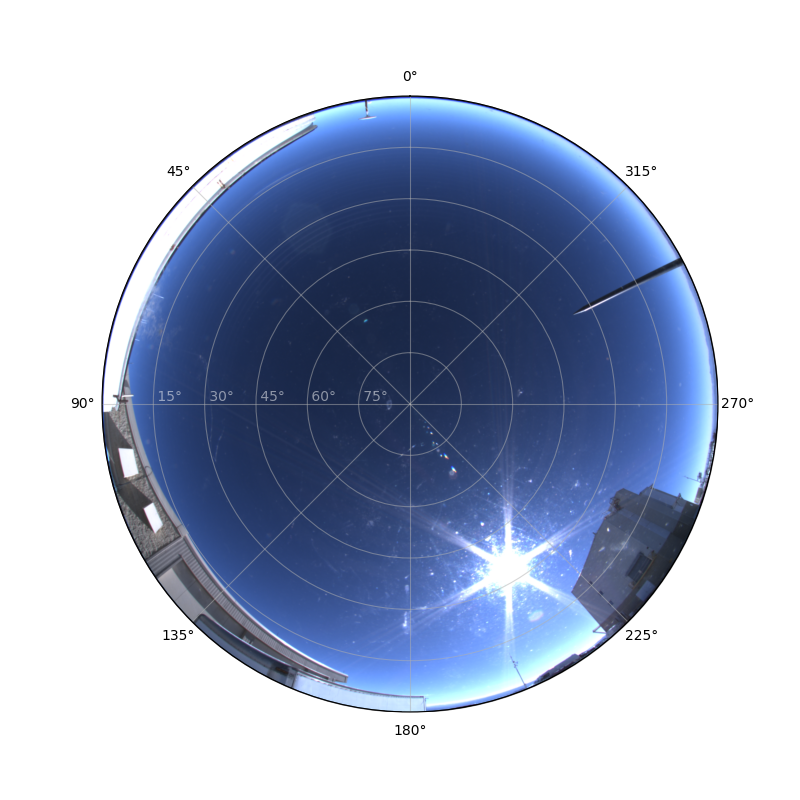

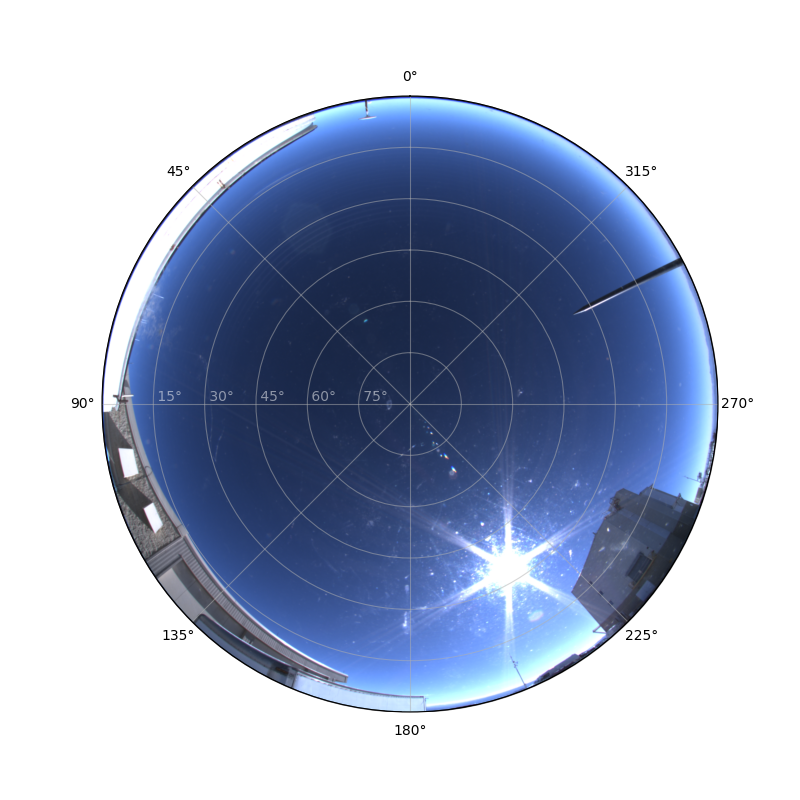

In [163]:
f = fits_to_png("../data/2022_11_04__13_56_03.fits.bz2")
f.show()